<a href="https://colab.research.google.com/github/megsdata/sEMG_SupervisedLearning/blob/main/23May24_AllMuscles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark

In [53]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=676ec94abad02bee8302393556b2e157098a9715f2e7edddddfe00b6c5a99267
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from google.colab import drive
drive.mount('/MSC_THESIS/')

Mounted at /MSC_THESIS/


In [31]:
from pandas.core.internals.array_manager import take_1d
%cd /MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/All_Data
!ls -m

/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/All_Data
22-May-2023_101_MATRIX.xlsx, 22-May-2023_102_MATRIX.xlsx,
22-May-2023_103_MATRIX.xlsx, 22-May-2023_104_MATRIX.xlsx,
22-May-2023_116_MATRIX.xlsx, 22-May-2023_121_MATRIX.xlsx,
22-May-2023_122_MATRIX.xlsx, 22-May-2023_123_MATRIX.xlsx,
22-May-2023_124_MATRIX.xlsx, 22-May-2023_125_MATRIX.xlsx,
22-May-2023_12_MATRIX.xlsx, 22-May-2023_13_MATRIX.xlsx,
22-May-2023_14_MATRIX.xlsx, 22-May-2023_15_MATRIX.xlsx,
22-May-2023_16_MATRIX.xlsx, 22-May-2023_21_MATRIX.xlsx,
22-May-2023_22_MATRIX.xlsx, 22-May-2023_23_MATRIX.xlsx,
22-May-2023_24_MATRIX.xlsx, 22-May-2023_25_MATRIX.xlsx,
22-May-2023_26_MATRIX.xlsx, 22-May-2023_31_MATRIX.xlsx,
22-May-2023_32_MATRIX.xlsx, 22-May-2023_33_MATRIX.xlsx,
22-May-2023_35_MATRIX.xlsx, 22-May-2023_36_MATRIX.xlsx,
22-May-2023_41_MATRIX.xlsx, 22-May-2023_42_MATRIX.xlsx,
22-May-2023_43_MATRIX.xlsx, 22-May-2023_44_MATRIX.xlsx,
22-May-2023_45_MATRIX.xlsx, 22-May-2023_46_MATRIX.xlsx,
22-May-2023_51_MATRIX.xlsx, 

In [ ]:
#making reading the files more efficient -ignore for now
mylist = !ls -m
elements = list()
for i in range(len(mylist)):
  elements.append(mylist[i].split(","))
  elements.pop()
print(elements)

In [32]:
#reading all the files
all_list = ['22-May-2023_101_MATRIX.xlsx', '22-May-2023_102_MATRIX.xlsx', \
            '22-May-2023_103_MATRIX.xlsx', '22-May-2023_104_MATRIX.xlsx', \
            '22-May-2023_116_MATRIX.xlsx', '22-May-2023_121_MATRIX.xlsx', \
            '22-May-2023_122_MATRIX.xlsx', '22-May-2023_123_MATRIX.xlsx', \
            '22-May-2023_124_MATRIX.xlsx', '22-May-2023_125_MATRIX.xlsx', \
            '22-May-2023_12_MATRIX.xlsx', '22-May-2023_13_MATRIX.xlsx', \
            '22-May-2023_14_MATRIX.xlsx', '22-May-2023_15_MATRIX.xlsx', \
            '22-May-2023_16_MATRIX.xlsx', '22-May-2023_21_MATRIX.xlsx', \
            '22-May-2023_22_MATRIX.xlsx', '22-May-2023_23_MATRIX.xlsx', \
            '22-May-2023_24_MATRIX.xlsx', '22-May-2023_25_MATRIX.xlsx', \
            '22-May-2023_26_MATRIX.xlsx', '22-May-2023_31_MATRIX.xlsx', \
            '22-May-2023_32_MATRIX.xlsx', '22-May-2023_33_MATRIX.xlsx', \
            '22-May-2023_35_MATRIX.xlsx', '22-May-2023_36_MATRIX.xlsx', \
            '22-May-2023_41_MATRIX.xlsx', '22-May-2023_42_MATRIX.xlsx', \
            '22-May-2023_43_MATRIX.xlsx', '22-May-2023_44_MATRIX.xlsx', \
            '22-May-2023_45_MATRIX.xlsx', '22-May-2023_46_MATRIX.xlsx', \
            '22-May-2023_51_MATRIX.xlsx', '22-May-2023_52_MATRIX.xlsx', \
            '22-May-2023_53_MATRIX.xlsx', '22-May-2023_54_MATRIX.xlsx', \
            '22-May-2023_55_MATRIX.xlsx', '22-May-2023_56_MATRIX.xlsx', \
            '22-May-2023_61_MATRIX.xlsx', '22-May-2023_62_MATRIX.xlsx', \
            '22-May-2023_63_MATRIX.xlsx', '22-May-2023_64_MATRIX.xlsx', \
            '22-May-2023_65_MATRIX.xlsx', '22-May-2023_66_MATRIX.xlsx', \
            '22-May-2023_71_MATRIX.xlsx', '22-May-2023_72_MATRIX.xlsx', \
            '22-May-2023_73_MATRIX.xlsx', '22-May-2023_74_MATRIX.xlsx', \
            '22-May-2023_75_MATRIX.xlsx', '22-May-2023_76_MATRIX.xlsx', \
            '22-May-2023_81_MATRIX.xlsx', '22-May-2023_82_MATRIX.xlsx', \
            '22-May-2023_83_MATRIX.xlsx', '22-May-2023_84_MATRIX.xlsx', \
            '22-May-2023_85_MATRIX.xlsx', '22-May-2023_86_MATRIX.xlsx', \
            '22-May-2023_91_MATRIX.xlsx', '22-May-2023_92_MATRIX.xlsx', \
            '22-May-2023_93_MATRIX.xlsx', '22-May-2023_94_MATRIX.xlsx', \
            '22-May-2023_95_MATRIX.xlsx', '22-May-2023_96_MATRIX.xlsx' \
]

['22-May-2023_101_MATRIX.xlsx', '22-May-2023_102_MATRIX.xlsx', '22-May-2023_103_MATRIX.xlsx', '22-May-2023_104_MATRIX.xlsx', '22-May-2023_116_MATRIX.xlsx', '22-May-2023_121_MATRIX.xlsx', '22-May-2023_122_MATRIX.xlsx', '22-May-2023_123_MATRIX.xlsx', '22-May-2023_124_MATRIX.xlsx', '22-May-2023_125_MATRIX.xlsx', '22-May-2023_12_MATRIX.xlsx', '22-May-2023_13_MATRIX.xlsx', '22-May-2023_14_MATRIX.xlsx', '22-May-2023_15_MATRIX.xlsx', '22-May-2023_16_MATRIX.xlsx', '22-May-2023_21_MATRIX.xlsx', '22-May-2023_22_MATRIX.xlsx', '22-May-2023_23_MATRIX.xlsx', '22-May-2023_24_MATRIX.xlsx', '22-May-2023_25_MATRIX.xlsx', '22-May-2023_26_MATRIX.xlsx', '22-May-2023_31_MATRIX.xlsx', '22-May-2023_32_MATRIX.xlsx', '22-May-2023_33_MATRIX.xlsx', '22-May-2023_35_MATRIX.xlsx', '22-May-2023_36_MATRIX.xlsx', '22-May-2023_41_MATRIX.xlsx', '22-May-2023_42_MATRIX.xlsx', '22-May-2023_43_MATRIX.xlsx', '22-May-2023_44_MATRIX.xlsx', '22-May-2023_45_MATRIX.xlsx', '22-May-2023_46_MATRIX.xlsx', '22-May-2023_51_MATRIX.xlsx',

In [58]:
test_df = pyspark.pandas.read_excel('22-May-2023_91_MATRIX.xlsx', index_col=0) 
test_df.show() 

AttributeError: ignored

In [49]:
all_df = pd.read_excel('22-May-2023_101_MATRIX.xlsx', usecols='A, C, D, H, J',\
                 dtype={'Participant ID': 'int32', 'Trial Type':'int32', \
                        'Pulse Width':'float64', 'Pain Label': 'int32', \
                        'EMG(mv)':'float64'})
for i in all_list[1:2]:
  temp = pd.read_excel(i, usecols='A, C, D, H, J',\
                 dtype={'Participant ID': 'int32', 'Trial Type':'int32', \
                        'Pulse Width':'float64', 'Pain Label': 'int32', \
                        'EMG(mv)':'float64'})
  pd.concat([all_df, temp], axis=0)

all_df.head()
len(all_df.index)

,Participant ID,Trial Type,Pulse Width,Pain Label,EMG(mv)
0,10,1,2.299034,1,27.455004
1,10,1,2.299034,1,36.682096
2,10,1,2.299034,1,48.090407
3,10,1,2.299034,1,57.477865
4,10,1,2.299034,1,55.186837


In [50]:
len(all_df.index)

80734

In [52]:
all_df.shape[0]

80734

In [51]:
import sys
import gc
def obj_size_fmt(num):
    if num<10**3:
        return "{:.2f}{}".format(num,"B")
    elif ((num>=10**3)&(num<10**6)):
        return "{:.2f}{}".format(num/(1.024*10**3),"KB")
    elif ((num>=10**6)&(num<10**9)):
        return "{:.2f}{}".format(num/(1.024*10**6),"MB")
    else:
        return "{:.2f}{}".format(num/(1.024*10**9),"GB")


def memory_usage():
    memory_usage_by_variable=pd.DataFrame({k:sys.getsizeof(v)\
    for (k,v) in globals().items()},index=['Size'])
    memory_usage_by_variable=memory_usage_by_variable.T
    memory_usage_by_variable=memory_usage_by_variable\
    .sort_values(by='Size',ascending=False).head(10)
    memory_usage_by_variable['Size']=memory_usage_by_variable['Size']\
    .apply(lambda x: obj_size_fmt(x))
    return memory_usage_by_variable
memory_usage()

,Size
all_df,2.21MB
temp,1.72MB
_i32,2.34KB
_i41,913.00B
_i51,868.00B
_ii,644.00B
_i49,644.00B
_i40,610.00B
_i39,589.00B
_i38,572.00B


In [ ]:
#select features
X = df_merged[['EMG(mv)', 'Pulse Width']]
y = df_merged['Pain Label']

NameError: ignored

In [ ]:
#create data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_vak_scaled = scaler.transform(X_val)

NameError: ignored

Fully Connected Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)
clf.fit(X_train,y_train)

Iteration 1, loss = 0.58793879
Iteration 2, loss = 0.55681952
Iteration 3, loss = 0.55099153
Iteration 4, loss = 0.55036981
Iteration 5, loss = 0.54528280
Iteration 6, loss = 0.54069254
Iteration 7, loss = 0.53794120
Iteration 8, loss = 0.53951568
Iteration 9, loss = 0.54397273
Iteration 10, loss = 0.56205983
Iteration 11, loss = 0.56153038
Iteration 12, loss = 0.56193324
Iteration 13, loss = 0.56159193
Iteration 14, loss = 0.56040713
Iteration 15, loss = 0.56043947
Iteration 16, loss = 0.56189055
Iteration 17, loss = 0.56115181
Iteration 18, loss = 0.56205467
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [ ]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #without scaling

0.7501774988966284

In [ ]:
y_pred_val=clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #without scaling

Using Tensorflow

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
31268/31268 [==============================] - 116s 4ms/step - loss: 0.3255 - accuracy: 0.8374 - precision: 0.8788 - recall: 0.9027
Epoch 2/10
31268/31268 [==============================] - 109s 3ms/step - loss: 0.2430 - accuracy: 0.8750 - precision: 0.9229 - recall: 0.9051
Epoch 3/10
31268/31268 [==============================] - 109s 3ms/step - loss: 0.2072 - accuracy: 0.8959 - precision: 0.9356 - recall: 0.9214
Epoch 4/10
31268/31268 [==============================] - 107s 3ms/step - loss: 0.1587 - accuracy: 0.9220 - precision: 0.9527 - recall: 0.9404
Epoch 5/10
31268/31268 [==============================] - 107s 3ms/step - loss: 0.1400 - accuracy: 0.9325 - precision: 0.9577 - recall: 0.9499
Epoch 6/10
31268/31268 [==============================] - 108s 3ms/step - loss: 0.1480 - accuracy: 0.9266 - precision: 0.9552 - recall: 0.9441
Epoch 7/10
31268/31268 [==============================] - 107s 3ms/step - loss: 0.1206 - accuracy: 0.9420 - precision: 0.9640 - recall: 0.9566

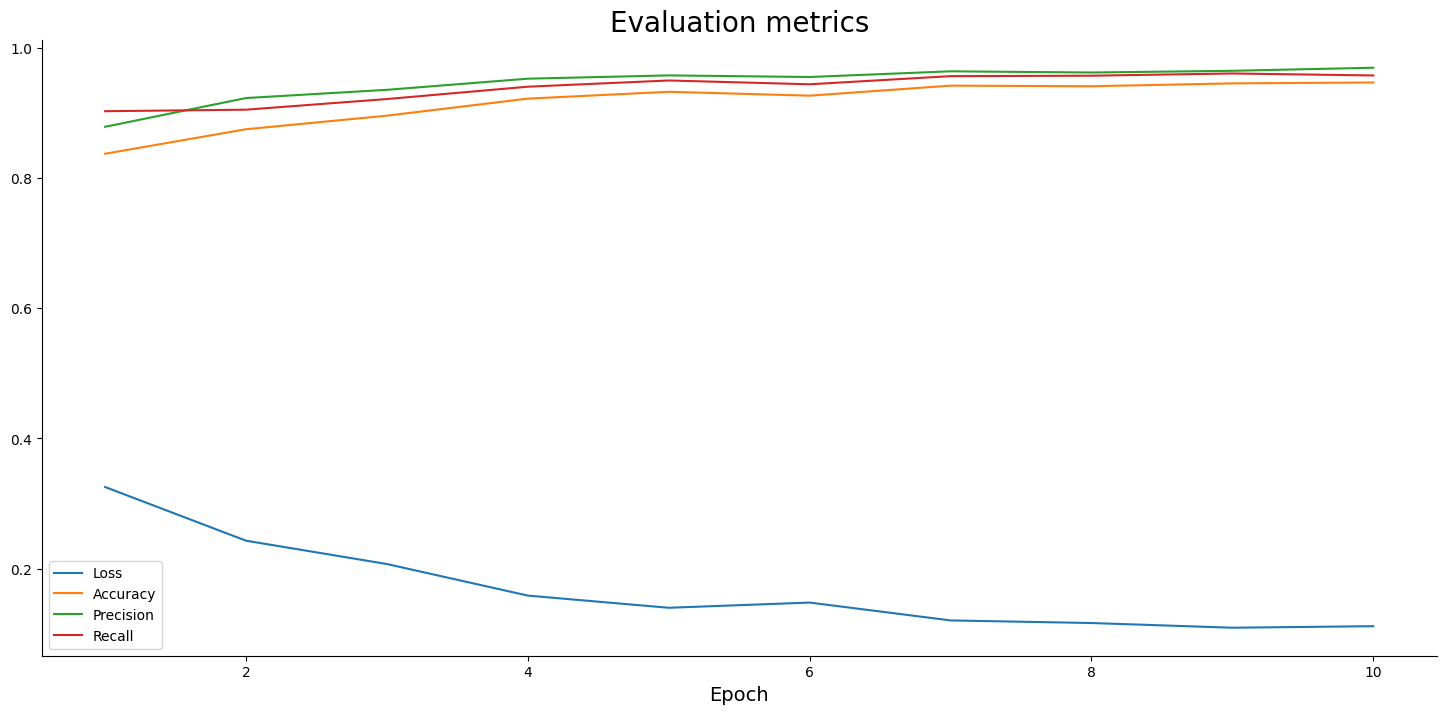

In [ ]:
#visualize performance
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 11), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 11), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 11), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 11), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
#evaluate performance
predictions = model.predict(X_test_scaled)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.4f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.4f}')

9772/9772 [==============================] - 14s 1ms/step
Accuracy: 0.9491
Precision: 0.9563
Recall: 0.9751
